In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from scipy.stats import iqr


In [12]:
data = pd.read_csv('Train.csv')

In [15]:
data_tableau = data.fillna(data.mean())

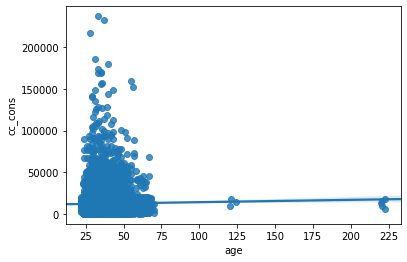

In [16]:
sns.regplot(x='age',y='cc_cons',data=data)

In [14]:
data_tableau.to_csv('Train_tableau.csv')

In [3]:
data.head()

,ID,account_type,gender,age,region_code,dc_cons_apr,dc_cons_may,dc_cons_jun,cc_count_apr,cc_count_may,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,cc_cons
0,12554,saving,F,36,336.0,10740.542453,26271.575951,12332.393444,4.0,6.0,...,2.0,1.0,110403.214364,1.114847e+06,6.868706e+05,2.0,1.0,161824.467583,NaN,1946.0
1,17645,current,M,24,529.0,15400.274698,16346.513708,13308.843760,14.0,10.0,...,2.0,17.0,336653.547124,4.010666e+05,2.368395e+05,10.0,31.0,530033.850635,NaN,66784.0
2,7604,current,M,34,541.0,NaN,16616.791206,8165.060330,19.0,8.0,...,4.0,22.0,359000.879855,8.944534e+05,1.896231e+06,5.0,24.0,481495.648386,Y,14469.0
3,1590,current,M,39,523.0,15962.461007,17848.552395,28502.691521,NaN,1.0,...,6.0,39.0,217724.536892,1.772801e+06,1.276362e+06,7.0,37.0,536714.940949,NaN,6494.0
4,16556,current,M,28,239.0,NaN,35661.995527,13474.223363,23.0,14.0,...,4.0,15.0,519029.306872,8.525740e+05,6.110580e+05,3.0,26.0,349316.588945,NaN,14588.0


In [4]:
data.groupby('region_code').cc_cons.mean().sort_values(ascending=False)

region_code
396.0    62552.333333
785.0    36391.200000
376.0    32205.333333
854.0    30481.000000
143.0    30385.000000
             ...     
408.0     2215.000000
968.0     2090.500000
137.0     2073.000000
402.0     1993.500000
421.0     1775.500000
Name: cc_cons, Length: 768, dtype: float64

In [5]:
data['account_type'] = data['account_type'].map({'saving' : 0, 'current' : 1})
data['gender'] = data['gender'].map({'M' : 0, 'F' : 1})

In [6]:
data_male = data[data['gender']<1]
data_female = data[data['gender']>0]

0    12794
1     2206
Name: gender, dtype: int64

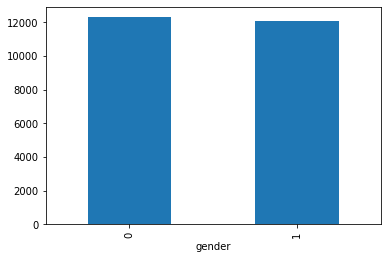

In [7]:
data.groupby('gender').cc_cons.mean().plot(kind='bar')

data['gender'].value_counts()

In [8]:
data_male.groupby('account_type').count()

,ID,gender,age,region_code,dc_cons_apr,dc_cons_may,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,cc_cons
account_type,,,,,,,,,,,,,,,,,,,,,
0,2779,2779,2779,2779,973,1014,791,2594,2684,2658,...,2602,2602,2415,2573,2654,2656,2645,2654,42,2779
1,10015,10015,10015,10015,4445,5024,3725,9272,9669,9504,...,9436,9436,9114,9415,9576,9584,9599,9576,176,10015


In [9]:
data_female.groupby('account_type').count()

,ID,gender,age,region_code,dc_cons_apr,dc_cons_may,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,cc_cons
account_type,,,,,,,,,,,,,,,,,,,,,
0,424,424,424,424,148,154,127,395,407,404,...,399,399,373,396,404,405,402,404,11,424
1,1782,1782,1782,1782,821,961,691,1654,1710,1690,...,1678,1678,1620,1668,1695,1698,1696,1695,37,1782


In [10]:
data_female.groupby('loan_enq').count()

,ID,account_type,gender,age,region_code,dc_cons_apr,dc_cons_may,dc_cons_jun,cc_count_apr,cc_count_may,...,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,cc_cons
loan_enq,,,,,,,,,,,,,,,,,,,,,
Y,48,48,48,48,48,26,32,20,47,46,...,44,46,46,44,46,46,46,46,46,48


In [11]:
data_male.groupby('loan_enq').count()

,ID,account_type,gender,age,region_code,dc_cons_apr,dc_cons_may,dc_cons_jun,cc_count_apr,cc_count_may,...,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,cc_cons
loan_enq,,,,,,,,,,,,,,,,,,,,,
Y,218,218,218,218,218,97,128,96,198,208,...,198,204,204,198,204,208,208,209,208,218
